# STEP-1 : Reading CSV File

In [200]:
import pandas as pd

In [201]:
data=pd.read_csv("C:/Users/Harini/OneDrive/Desktop/selectedfeatures.csv")

In [202]:
data

,MAX TEMP,MIN TEMP,DBT,WBT,DEW POINT TEMPERATURE,WIND SPEED
0,31,21,25,24,23,2
1,30,20,22,21,21,2
2,29,20,25,22,21,4
3,30,20,24,21,20,4
4,29,19,23,22,21,4
...,...,...,...,...,...,...
1972,29,18,32,23,18,14
1973,29,19,35,23,16,24
1974,25,20,34,22,15,20
1975,26,20,33,23,17,12


# STEP-2 : Feature Extraction and Data Cleaning

In [203]:
type(data)

pandas.core.frame.DataFrame

In [204]:
data.dtypes

 MAX TEMP                 int64
MIN TEMP                  int64
DBT                       int64
WBT                       int64
DEW POINT TEMPERATURE     int64
WIND SPEED                int64
dtype: object

In [205]:
data.isnull().sum()

 MAX TEMP                 0
MIN TEMP                  0
DBT                       0
WBT                       0
DEW POINT TEMPERATURE     0
WIND SPEED                0
dtype: int64

In [206]:
data['WIND SPEED'].value_counts()

4     340
6     305
8     294
2     285
10    186
12    140
14    108
0     106
16     61
18     44
20     37
22     30
24     18
28      6
26      6
30      5
32      4
42      1
40      1
Name: WIND SPEED, dtype: int64

In [207]:
data.isnull()

,MAX TEMP,MIN TEMP,DBT,WBT,DEW POINT TEMPERATURE,WIND SPEED
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1972,False,False,False,False,False,False
1973,False,False,False,False,False,False
1974,False,False,False,False,False,False
1975,False,False,False,False,False,False


In [208]:
#data['WIND SPEED']=data['WIND SPEED'].map({'0':0,"2":2,'4':4,"6":6,"8":8,"10":10,"12":12,"14":14,'16':16,"18":18,'20':20,"22":22,"24":24,"28":28,"26":26,"30":30,'32':32,"40":40,"42":42})

In [209]:
 data["WIND SPEED"].isnull().sum()
#print("Number of null values in 'WIND SPEED' column:", num_null_values)


0

In [210]:
data['WIND SPEED']

0        2
1        2
2        4
3        4
4        4
        ..
1972    14
1973    24
1974    20
1975    12
1976    24
Name: WIND SPEED, Length: 1977, dtype: int64

In [211]:
# Replace null values in the "WIND SPEED" column with 0
#data["WIND SPEED"].fillna(0, inplace=True)


In [212]:
data.dtypes

 MAX TEMP                 int64
MIN TEMP                  int64
DBT                       int64
WBT                       int64
DEW POINT TEMPERATURE     int64
WIND SPEED                int64
dtype: object

In [213]:

data['WIND SPEED'] = data['WIND SPEED'].astype(int)


In [214]:
data.dtypes

 MAX TEMP                 int64
MIN TEMP                  int64
DBT                       int64
WBT                       int64
DEW POINT TEMPERATURE     int64
WIND SPEED                int32
dtype: object

In [215]:
data.isnull().sum()

 MAX TEMP                 0
MIN TEMP                  0
DBT                       0
WBT                       0
DEW POINT TEMPERATURE     0
WIND SPEED                0
dtype: int64

# STEP 3 : EDA

In [216]:
import matplotlib.pyplot as plt


In [217]:
data.corr()

,MAX TEMP,MIN TEMP,DBT,WBT,DEW POINT TEMPERATURE,WIND SPEED
MAX TEMP,1.000000,0.499179,0.109359,0.170343,0.061094,0.053557
MIN TEMP,0.499179,1.000000,0.150446,0.229736,0.099416,0.036611
DBT,0.109359,0.150446,1.000000,0.372967,-0.409989,0.407353
WBT,0.170343,0.229736,0.372967,1.000000,0.658905,0.105765
DEW POINT TEMPERATURE,0.061094,0.099416,-0.409989,0.658905,1.000000,-0.209833
WIND SPEED,0.053557,0.036611,0.407353,0.105765,-0.209833,1.000000


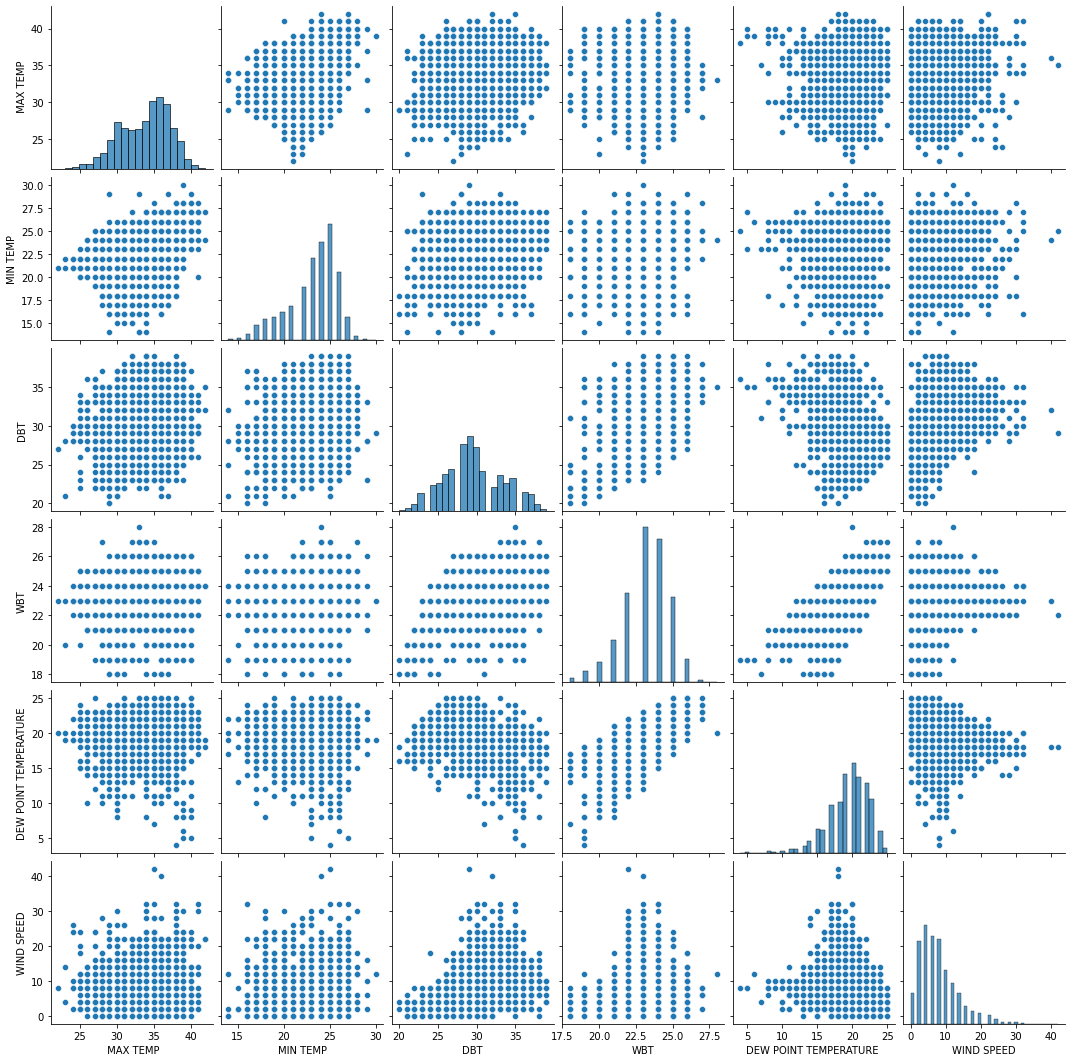

In [218]:
import seaborn as sns
sns.pairplot(data)

In [219]:
data.corr()
#negative is indirectly prop incres and dec if its postive one incresase other also increases

,MAX TEMP,MIN TEMP,DBT,WBT,DEW POINT TEMPERATURE,WIND SPEED
MAX TEMP,1.000000,0.499179,0.109359,0.170343,0.061094,0.053557
MIN TEMP,0.499179,1.000000,0.150446,0.229736,0.099416,0.036611
DBT,0.109359,0.150446,1.000000,0.372967,-0.409989,0.407353
WBT,0.170343,0.229736,0.372967,1.000000,0.658905,0.105765
DEW POINT TEMPERATURE,0.061094,0.099416,-0.409989,0.658905,1.000000,-0.209833
WIND SPEED,0.053557,0.036611,0.407353,0.105765,-0.209833,1.000000


# STEP 4 : Training and Testing 

# CASE 1 : Using Linear Regression

In [220]:
x=data.drop('WIND SPEED',axis=1)

In [221]:
x

,MAX TEMP,MIN TEMP,DBT,WBT,DEW POINT TEMPERATURE
0,31,21,25,24,23
1,30,20,22,21,21
2,29,20,25,22,21
3,30,20,24,21,20
4,29,19,23,22,21
...,...,...,...,...,...
1972,29,18,32,23,18
1973,29,19,35,23,16
1974,25,20,34,22,15
1975,26,20,33,23,17


In [222]:
y=data["WIND SPEED"]

In [223]:
y

0        2
1        2
2        4
3        4
4        4
        ..
1972    14
1973    24
1974    20
1975    12
1976    24
Name: WIND SPEED, Length: 1977, dtype: int32

In [224]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [225]:
from sklearn.preprocessing import StandardScaler

In [226]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [227]:
x_train

array([[-0.54923205, -0.44651574, -0.16505915, -0.11284   , -0.15608946],
       [ 1.71098842,  1.4398478 ,  0.88932731,  1.17353595,  0.51055198],
       [ 0.86340575, -0.06924303,  0.36213408,  0.53034798,  0.51055198],
       ...,
       [ 1.42846086,  1.4398478 , -0.955849  , -0.75602797,  0.17723126],
       [-1.11428717, -0.06924303, -1.74663884, -1.39921594,  0.17723126],
       [-0.26670449, -0.06924303,  0.88932731,  0.53034798, -0.48941018]])

In [228]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [229]:
regression.fit(x_train,y_train)

LinearRegression()

In [230]:
## cross validation cross val score ,cross validation method ,give x train , y train its creates a cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)

In [231]:
import numpy as np
np.mean(validation_score)

-28.928688986377555

In [232]:
## prediction
y_pred=regression.predict(x_test)

In [233]:
y_pred

array([ 7.24489767,  7.20877013,  4.03602156,  9.57685028,  7.88925796,
        5.41925744,  3.83307584, 10.5486684 ,  8.12074168,  6.73821315,
        3.58617075,  2.38461063,  6.75632191,  9.24330312,  7.81737501,
       11.30339056,  7.95099458,  7.77309366, 10.88103363,  4.24302427,
        8.82509238,  6.81202228,  7.28852553,  6.21086386, 10.26935676,
        7.80082031,  4.70410614,  7.29876184,  7.01902499,  6.19732728,
        7.09920559, 11.72839428, 10.0409458 ,  7.79780218, 12.09499699,
        6.51499174,  7.39620001, 11.2477987 ,  8.82655646,  6.43413913,
        7.22461748,  8.93234615,  3.80222783,  8.3534612 ,  6.6497755 ,
        6.70967592,  7.6081109 ,  8.75283731,  6.49908604,  8.72001005,
        6.05465334, 10.72143363, 10.20465665,  7.2460796 , 12.23352474,
       12.02155998,  3.98517551,  6.99346976,  8.1542763 ,  4.32504107,
        7.62170134,  9.4831331 ,  6.41388722,  5.41925744,  7.87873951,
        9.61627809,  9.590333  ,  5.24654607,  3.7924661 , 11.49

In [234]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

24.770998389748954
3.8264721653155735
4.977047155668605


In [235]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

0.18855638093788507
0.18025941141782253


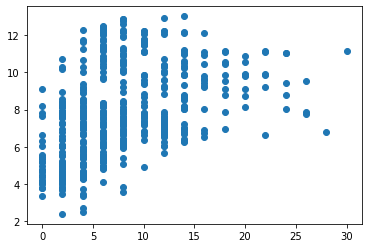

In [236]:
#Assumptions
plt.scatter(y_test,y_pred)

In [237]:
residuals=y_test-y_pred
print(residuals)

1827    -3.244898
1889     6.791230
678     -4.036022
351      6.423150
1105     0.110742
          ...    
1530     0.304785
670     -1.001101
874     -3.946512
482     14.570731
422     -3.730325
Name: WIND SPEED, Length: 495, dtype: float64


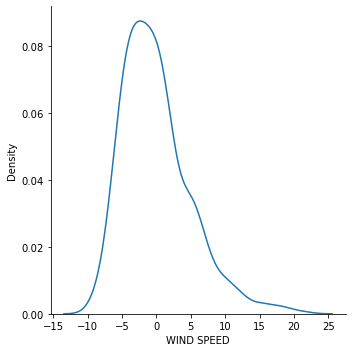

In [238]:
## Plot this residuals
sns.displot(residuals,kind='kde') #kernal density estimation
#normal distribution the model we have created is good

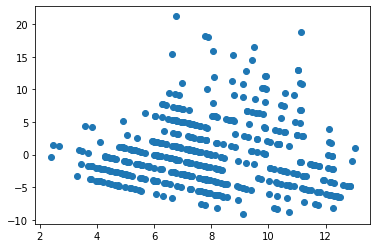

In [239]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [240]:
import statsmodels.api as sm
model=sm.OLS(y_train,x_train).fit()

In [241]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             WIND SPEED   R-squared (uncentered):                   0.058
Model:                            OLS   Adj. R-squared (uncentered):              0.055
Method:                 Least Squares   F-statistic:                              18.35
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                    1.04e-17
Time:                        21:46:45   Log-Likelihood:                         -5435.0
No. Observations:                1482   AIC:                                  1.088e+04
Df Residuals:                    1477   BIC:                                  1.091e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0568      0.287      0.198      0.843      -0.506       0.620
x2            -0.0355      0.290     -0.122      0.903      -0.605       0.534
x3             2.5852      0.813      3.178      0.002       0.990       4.181
x4            -0.4274      0.998     -0.428      0.668      -2.384       1.529
x5             0.2019      1.024      0.197      0.844      -1.807       2.210
==============================================================================
Omnibus:                      398.737   Durbin-Watson:                   0.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1157.732
Skew:                           1.366   Prob(JB):                    4.00e-252
Kurtosis:                       6.359   Cond. No.                         9.01
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [242]:
print(regression.coef_)

[ 0.05677195 -0.03552104  2.58517599 -0.42738132  0.20190004]


# CASE 2 : Support vector regressor

In [243]:
from sklearn.svm import SVR

In [244]:
x1=data.drop('WIND SPEED',axis=1)

In [245]:
y1=data["WIND SPEED"]

In [246]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25,random_state=42)

In [247]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#x_train=scaler.fit_transform(x_train)
#x_test=scaler.fit_transform(x_test)
x_train_scaled = scaler.fit_transform(x1_train)
x_test_scaled = scaler.transform(x1_test)

In [248]:
## cross validation cross val score ,cross validation method ,give x train , y train its creates a cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,x1_train,y1_train,scoring='neg_mean_squared_error',
                                cv=3)

In [249]:
# Initialize SVR model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

In [250]:
svr.fit(x_train_scaled, y1_train)

SVR()

In [251]:
# Predict on the test set
y_pred1 = svr.predict(x_test_scaled)

In [252]:
y_pred1

array([ 7.84564354,  7.48980222,  2.23848738, 11.8864823 ,  8.66928755,
        3.90037492,  4.06258836, 11.90963271,  9.94525015,  6.9862281 ,
        2.91769087,  2.24703151,  8.07523534, 11.22149353,  5.50914918,
        7.04631901,  7.87102909,  4.77689358,  8.74936514,  2.11812461,
        9.19840609,  9.07528972,  7.39367118,  6.09453395,  8.02159791,
        5.27027081,  3.68858974, 10.14870967,  7.52636212,  6.49975617,
        4.448758  ,  7.62582459, 10.19117319,  4.88848492,  8.5019739 ,
        6.16323229,  9.35211255,  6.31181327, 10.73170692,  5.72958084,
        4.23922706,  9.20954756,  2.30316426,  5.24548458,  6.01864955,
        8.20186067,  8.49553111, 10.84490522,  4.78039532, 11.93834948,
        4.49388179,  9.19615443,  6.59821783, 10.05013632,  8.31180309,
        6.92124403,  1.79794643,  5.74496688,  5.18402548,  3.17919992,
        6.59715018,  5.81676157,  8.22661046,  3.90037492,  9.18892226,
        8.99289358,  7.42886799,  4.32830265,  3.60825235,  8.55

In [253]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y1_test,y_pred1)
mae=mean_absolute_error(y1_test,y_pred1)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

20.08239561479477
3.3136434614422594
4.481338596311907


In [254]:
from sklearn.metrics import r2_score
score=r2_score(y1_test,y_pred1)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y1_test)-1)/(len(y1_test)-x1_test.shape[1]-1))

0.34214473229105213
0.3354181958114105


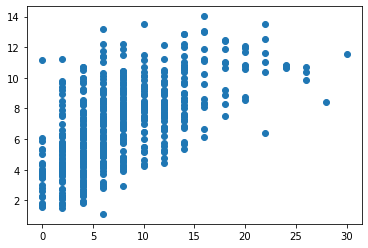

In [255]:
#Assumptions
plt.scatter(y1_test,y_pred1)

In [256]:
residuals=y1_test-y_pred1
print(residuals)

1827    -3.845644
1889     6.510198
678     -2.238487
351      4.113518
1105    -0.669288
          ...    
1530     0.578549
670      0.280579
874     -5.214123
482     13.379351
422     -7.195135
Name: WIND SPEED, Length: 495, dtype: float64


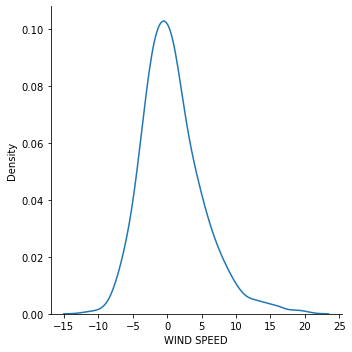

In [257]:
## Plot this residuals
sns.displot(residuals,kind='kde') #kernal density estimation
#normal distribution the model we have created is good

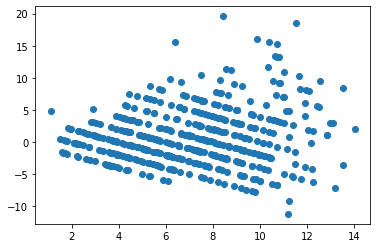

In [258]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred1,residuals)

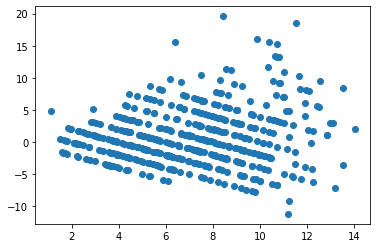

In [259]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred1,residuals)

In [260]:
import statsmodels.api as sm
model1=sm.OLS(y1_train,x1_train).fit()

In [261]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             WIND SPEED   R-squared (uncentered):                   0.697
Model:                            OLS   Adj. R-squared (uncentered):              0.696
Method:                 Least Squares   F-statistic:                              680.2
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                        0.00
Time:                        21:46:45   Log-Likelihood:                         -4594.4
No. Observations:                1482   AIC:                                      9199.
Df Residuals:                    1477   BIC:                                      9225.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
 MAX TEMP                 -0.0200      0.044     -0.451      0.652      -0.107       0.067
MIN TEMP                  -0.0370      0.062     -0.600      0.549      -0.158       0.084
DBT                        0.7846      0.117      6.727      0.000       0.556       1.013
WBT                       -0.8206      0.315     -2.603      0.009      -1.439      -0.202
DEW POINT TEMPERATURE      0.2645      0.182      1.452      0.147      -0.093       0.622
==============================================================================
Omnibus:                      397.795   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1135.460
Skew:                           1.370   Prob(JB):                    2.74e-247
Kurtosis:                       6.298   Cond. No.                         161.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [262]:
print(regression.coef_)

[ 0.05677195 -0.03552104  2.58517599 -0.42738132  0.20190004]


# STEP 5 : Interface

In [263]:
!pip install -q pyngrok # for creating local address sp that user can use our app
!pip install -q streamlit #designing the frontend pf ML app

ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#designing'


In [264]:
import pickle
pickle_out=open('windspeed1.pkl','wb')
pickle.dump(regression,pickle_out)
pickle_out.close()
     